In [27]:
import numpy as np
from mnist import MNIST
from const import *
from matplotlib import pyplot as plt

In [28]:
# Create dataset with full size 28*28
digits, labels = MNIST('./MNIST').load_training()

with open("./image.dat", "w") as image_file:
    for i in range(M):
        tmp = "\n".join(str(bit) for bit in digits[i]) + "\n"
        image_file.writelines(tmp)

with open("./label.dat", "w") as label_file:
    for i in range(M):
        label_file.writelines(str(labels[i]) + "\n")

In [29]:
# Load compressed result and recover image
k = 10
img_num = 100
img_dim = 784

with open("./y.dat") as fy:
    y = np.zeros([k,img_num],dtype=float)
    r = 0
    for line in fy.readlines():
        y_r = line.strip().split()
        for i in range(len(y_r)):
            y[r][i] = float(y_r[i].strip())
        r += 1

with open("./tsf.dat") as ftsf:
    tsf = np.zeros([k,img_dim],dtype=float)
    r = 0
    for line in ftsf.readlines():
        tsf_r = line.strip().split()
        for i in range(len(tsf_r)):
            tsf[r][i] = float(tsf_r[i].strip())
        r += 1

y = y.T

# Recover image
rec = np.matmul(y, tsf)
rec[rec>255] = 255
rec[rec<0] = 0

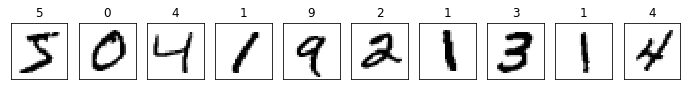

In [30]:
# Plot original dataset
fig, ax = plt.subplots(1, 10)
digits = np.zeros([10, 28, 28], dtype=np.uint8)

with open("./image.dat") as image_file:
    for i in range(10):
        for j in range(28):
            for k in range(28):
                digits[i][j][k] = int(image_file.readline())

for i in range(10):
    digit = digits[i]
    ax[i].imshow(digit, cmap=plt.cm.gray_r, interpolation="nearest")
    ax[i].set_title(labels[i])
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)

fig.set_size_inches(12, 8)

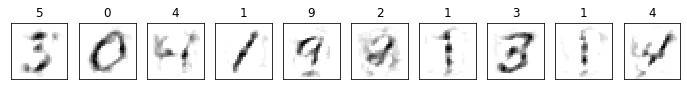

In [31]:
# Plot recover image
fig, ax = plt.subplots(1, 10)
digits = np.zeros([10, 28, 28], dtype=np.uint8)

rec = rec.reshape(100, 28, 28)[0:10, :, :]
for i in range(10):
    x = rec[i]
    ax[i].imshow(x, cmap=plt.cm.gray_r, interpolation="nearest")
    ax[i].set_title(labels[i])
    ax[i].get_xaxis().set_visible(False)
    ax[i].get_yaxis().set_visible(False)

fig.set_size_inches(12, 8)